In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from scipy.stats import binned_statistic
df = pd.read_csv('data/2013-2014.csv',sep=',')

In [300]:
df

,Number,Race,Race Grouping,Gender,Age,In Custody/Community,Supervision Type,Jurisdiction,Sentence Type,Aggregate Sentence Length,Institutional Security Level,Province,Location Type,Offender Security Level,Dynamic/Need,Static/Risk,Reintegration Potential,Motivation,Major Offence Group,Religion
0,B1,WHITE,Non Aboriginal,MALE,40,Community,FP,FEDERAL,DETERMINATE,912,NaN,PRINCE EDWARD I,PAROLE OFFICE,MINIMUM,LOW,LOW,HIGH,HIGH,OTHER CRIM.CODE,CATHOLIC - ROMA
1,B2,EURO.-WESTERN,Non Aboriginal,MALE,57,Community,SR,FEDERAL,DETERMINATE,6338,NaN,ONTARIO,PAROLE OFFICE,MINIMUM,LOW,MEDIUM,MEDIUM,HIGH,TRAF/IMP. DRUGS,CATH NON-SPEC
2,B3,WHITE,Non Aboriginal,MALE,66,Community,SR,FEDERAL,DETERMINATE,1826,NaN,ONTARIO,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,MEDIUM,HIGH,SEXUAL ABUSE,CATHOLIC - ROMA
3,B4,WHITE,Non Aboriginal,MALE,23,Community,DP,FEDERAL,DETERMINATE,730,NaN,ONTARIO,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,HIGH,HIGH,TRAF/IMP. DRUGS,NONE
4,B5,WHITE,Non Aboriginal,MALE,34,Community,FP,FEDERAL,DETERMINATE,913,NaN,ONTARIO,PAROLE OFFICE,MINIMUM,LOW,LOW,HIGH,HIGH,TRAF/IMP. DRUGS,ANGLICAN(EPIS.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23147,B23148,WHITE,Non Aboriginal,MALE,65,In Custody,NaN,FEDERAL,DETERMINATE,730,MULTI-LEVEL,QUEBEC,FEDERAL INSTITU,MINIMUM,MEDIUM,HIGH,MEDIUM,HIGH,SEXUAL ASSAULT,CATH NON-SPEC
23148,B23149,WHITE,Non Aboriginal,MALE,60,In Custody,NaN,FEDERAL,DETERMINATE,853,MEDIUM,QUEBEC,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,MEDIUM,LOW,CRIM CODE TRAFF,CATH NON-SPEC
23149,B23150,WHITE,Non Aboriginal,MALE,46,In Custody,NaN,FEDERAL,DETERMINATE,2557,MEDIUM,QUEBEC,FEDERAL INSTITU,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,TRAF/IMP. DRUGS,CATH NON-SPEC
23150,B23151,WHITE,Non Aboriginal,MALE,32,In Custody,NaN,FEDERAL,DETERMINATE,3349,MEDIUM,QUEBEC,FEDERAL INSTITU,MEDIUM,HIGH,MEDIUM,MEDIUM,MEDIUM,ROBBERY,CATH NON-SPEC


In [93]:
def pie_preprocess(df, should_filter, group_column):
    df = df[df['Sentence Type']=='DETERMINATE']
    df = df[group_column].value_counts(sort=True, ascending=False)[:10]
    x = df.index
    y = df.values
    return x, y

In [285]:
def make_pie(x,y, graph_title, legend_title):
    theme = plt.get_cmap('coolwarm_r')
    explode = [0]*len(x)
    explode[0] = 0.05
    fig, ax = plt.subplots(figsize=(7, 7))

    ax.set_prop_cycle("color", [theme(1. * i / len(y)) for i in range(len(y))])

    wedges, texts, autotexts = ax.pie(y,labels=x,explode=explode,autopct='%1.1f%%')
    percent = 100.*y/y.sum()
    labels = ['{0:5} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
    ax.legend(wedges,
                   labels,
                   title=legend_title,
                   loc="center right",
                   bbox_to_anchor=(1.7, 0.5))
    ax.set_title(graph_title)

In [230]:
df_cm = df[df['In Custody/Community']=='Community']
df_ct = df[df['In Custody/Community']=='In Custody']

# Race

## Race Distribution Pie

5856
11080


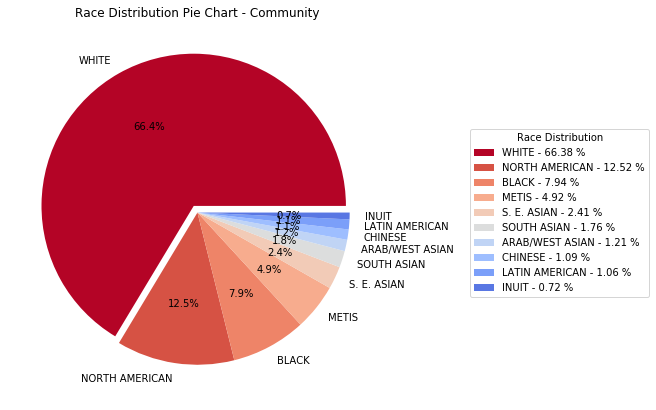

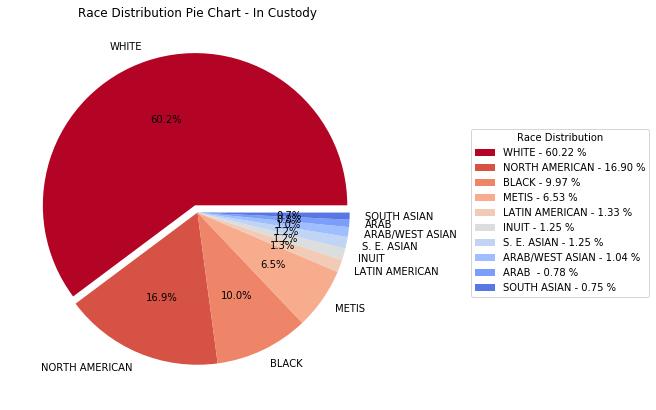

In [284]:
x_cm, y_cm = pie_preprocess(df_cm, True, 'Race')
x_ct, y_ct = pie_preprocess(df_ct, True, 'Race')
community_pie = make_pie(x_cm,y_cm, 'Race Distribution Pie Chart - Community', "Race Distribution")
custody_pie = make_pie(x_ct,y_ct, 'Race Distribution Pie Chart - In Custody', "Race Distribution")

## Race vs. Average Sentence Length Bar

In [242]:
def bar_preprocess(df, group_column):
    df = df[df['Sentence Type']=='DETERMINATE']
    top_10 = df[group_column].value_counts(sort=True, ascending=False)[:10].index
    df = df[df[group_column].isin(list(top_10))]
    avg_sentence = df.groupby([group_column])['Aggregate Sentence Length'].mean().sort_values(ascending=True)
    return top_10, avg_sentence

In [247]:
# Group gender
df_cm_m = df_cm[df_cm['Gender']=='MALE']
df_cm_f = df_cm[df_cm['Gender']=='FEMALE']
df_ct_m = df_ct[df_ct['Gender']=='MALE']
df_ct_f = df_ct[df_ct['Gender']=='FEMALE']

In [248]:
top_10_cm, avg_sen_cm_m = bar_preprocess(df_cm_m, 'Race')
_, avg_sen_cm_f = bar_preprocess(df_cm_f, 'Race')
top_10_ct, avg_sen_ct_m = bar_preprocess(df_ct_m, 'Race')
_, avg_sen_ct_f = bar_preprocess(df_ct_f, 'Race')

In [250]:
ave_sen_cm = avg_sen_cm_m.to_frame().merge(avg_sen_cm_f.to_frame(),how='outer', left_index=True,right_index=True,suffixes=('_m','_f'))
ave_sen_ct = avg_sen_ct_m.to_frame().merge(avg_sen_ct_f.to_frame(),how='outer', left_index=True,right_index=True,suffixes=('_m','_f'))
ave_sen_cm.fillna(0, inplace=True)
ave_sen_ct.fillna(0, inplace=True)
top_10_cm = list(top_10_cm)
top_10_ct = list(top_10_ct)
top_10_cm.reverse()
top_10_ct.reverse()
ave_sen_cm = ave_sen_cm.reindex(top_10_cm)
ave_sen_ct = ave_sen_ct.reindex(top_10_ct)

Text(0, 0.5, 'Sentence (days)')

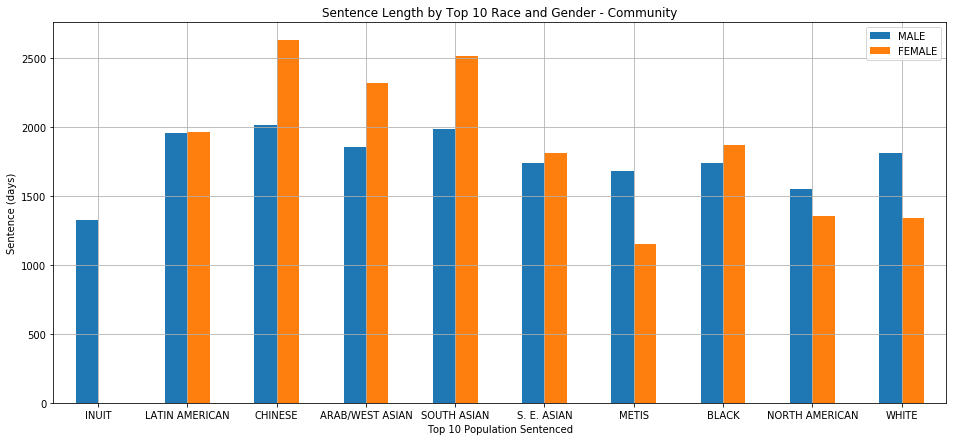

In [269]:
ax_cm = ave_sen_cm.plot.bar(rot=0, 
                         figsize=((16,7)), 
                         width=0.5, 
                         grid=True,
                         title='Sentence Length by Top 10 Race and Gender - Community')
ax_cm.legend(['MALE','FEMALE'])
ax_cm.set_xlabel('Top 10 Population')
ax_cm.set_ylabel('Sentence (days)')

Text(0, 0.5, 'Sentence (days)')

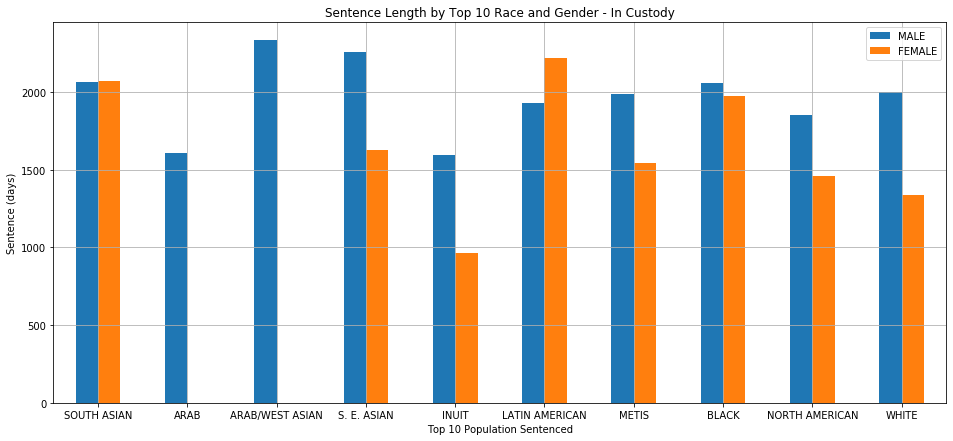

In [270]:
ax_ct = ave_sen_ct.plot.bar(rot=0, 
                         figsize=((16,7)), 
                         width=0.5, 
                         grid=True,
                         title='Sentence Length by Top 10 Race and Gender - In Custody')
ax_ct.legend(['MALE','FEMALE'])
ax_ct.set_xlabel('Top 10 Population')
ax_ct.set_ylabel('Sentence (days)')

# Religion

## Religion Pies

4793
9557


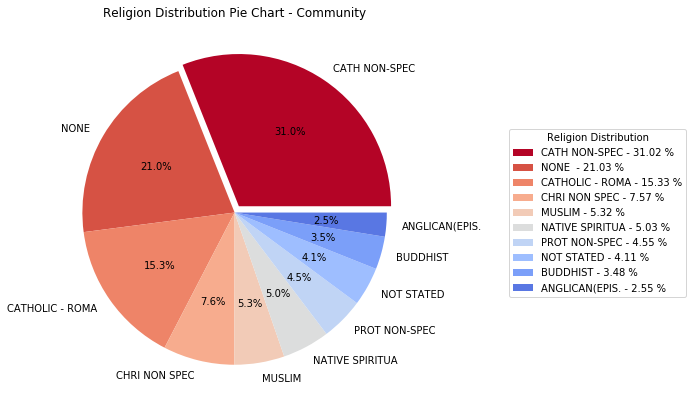

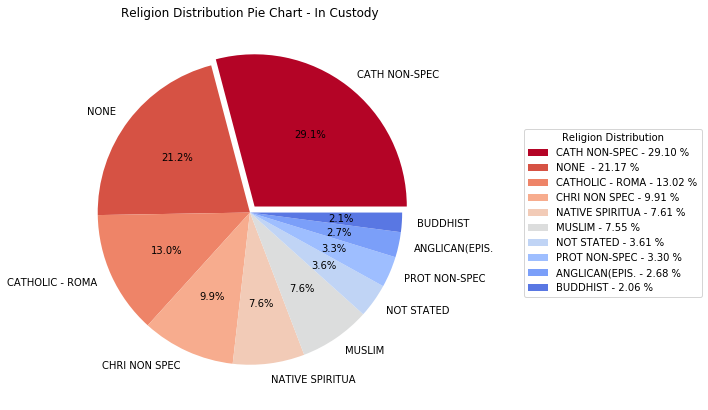

In [272]:
x_reli_cm, y_reli_cm = pie_preprocess(df_cm, True, 'Religion')
x_reli_ct, y_reli_ct = pie_preprocess(df_ct, True, 'Religion')
community_reli_pie = make_pie(x_reli_cm,y_reli_cm, 'Religion Distribution Pie Chart - Community', "Religion Distribution")
custody_reli_pie = make_pie(x_reli_ct,y_reli_ct, 'Religion Distribution Pie Chart - In Custody', "Religion Distribution")

## Religions Bars

In [273]:
top_10_cm, avg_sen_cm_m = bar_preprocess(df_cm_m, 'Religion')
_, avg_sen_cm_f = bar_preprocess(df_cm_f, 'Religion')
top_10_ct, avg_sen_ct_m = bar_preprocess(df_ct_m, 'Religion')
_, avg_sen_ct_f = bar_preprocess(df_ct_f, 'Religion')


In [274]:
ave_sen_cm = avg_sen_cm_m.to_frame().merge(avg_sen_cm_f.to_frame(),how='outer', left_index=True,right_index=True,suffixes=('_m','_f'))
ave_sen_ct = avg_sen_ct_m.to_frame().merge(avg_sen_ct_f.to_frame(),how='outer', left_index=True,right_index=True,suffixes=('_m','_f'))
ave_sen_cm.fillna(0, inplace=True)
ave_sen_ct.fillna(0, inplace=True)
top_10_cm = list(top_10_cm)
top_10_ct = list(top_10_ct)
top_10_cm.reverse()
top_10_ct.reverse()
ave_sen_cm = ave_sen_cm.reindex(top_10_cm)
ave_sen_ct = ave_sen_ct.reindex(top_10_ct)

Text(0, 0.5, 'Sentence (days)')

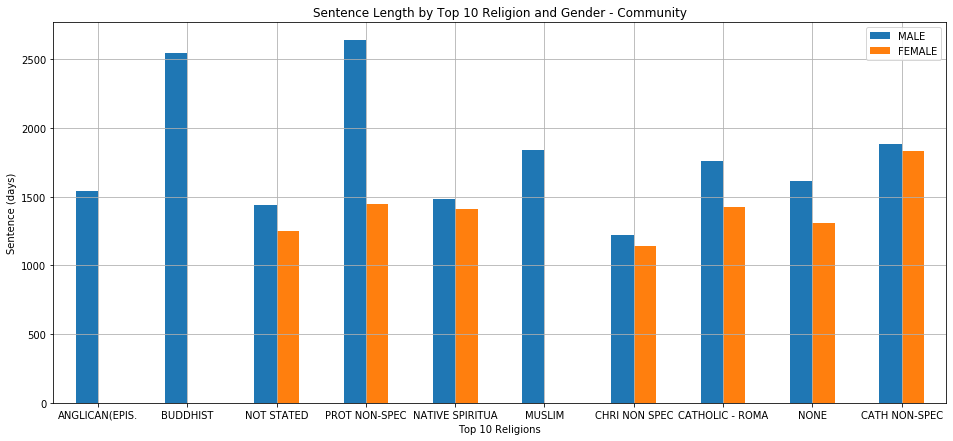

In [275]:
ax_reli_cm = ave_sen_cm.plot.bar(rot=0, 
                         figsize=((16,7)), 
                         width=0.5, 
                         grid=True,
                         title='Sentence Length by Top 10 Religions and Gender - Community')
ax_reli_cm.legend(['MALE','FEMALE'])
ax_reli_cm.set_xlabel('Top 10 Religions')
ax_reli_cm.set_ylabel('Sentence (days)')

Text(0, 0.5, 'Sentence (days)')

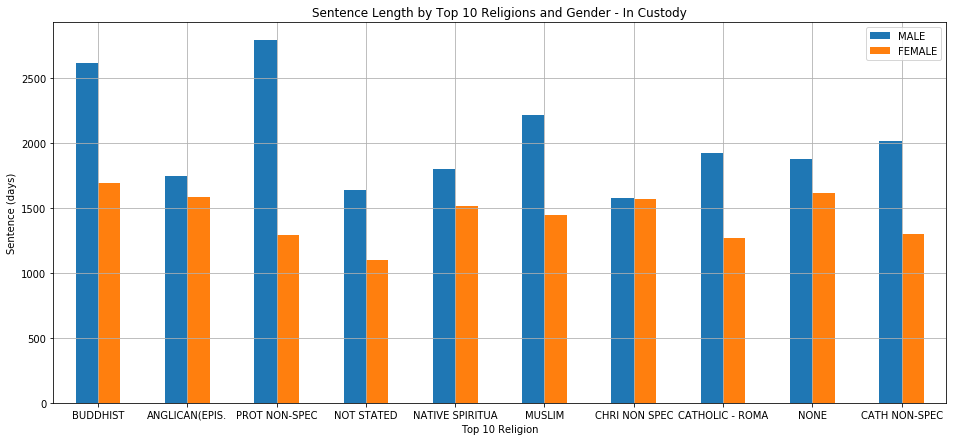

In [276]:
ax_reli_ct = ave_sen_ct.plot.bar(rot=0, 
                         figsize=((16,7)), 
                         width=0.5, 
                         grid=True,
                         title='Sentence Length by Top 10 Religions and Gender - In Custody')
ax_reli_ct.legend(['MALE','FEMALE'])
ax_reli_ct.set_xlabel('Top 10 Religion')
ax_reli_ct.set_ylabel('Sentence (days)')

# Race Group

## Race group pie

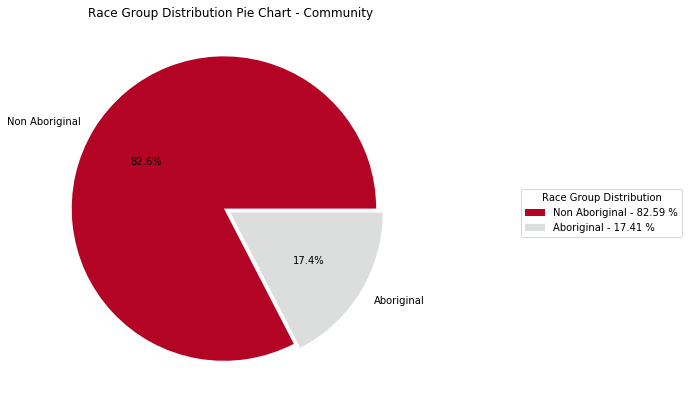

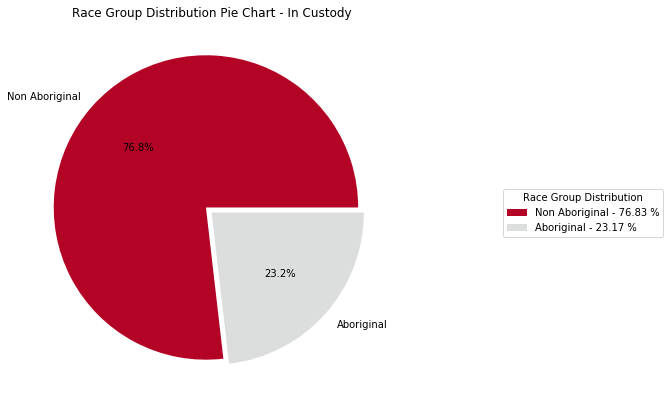

In [286]:
x_rg_cm, y_rg_cm = pie_preprocess(df_cm, True, 'Race Grouping')
x_rg_ct, y_rg_ct = pie_preprocess(df_ct, True, 'Race Grouping')
community_rg_pie = make_pie(x_rg_cm,y_rg_cm, 'Race Group Distribution Pie Chart - Community', "Race Group Distribution")
custody_rg_pie = make_pie(x_rg_ct,y_rg_ct, 'Race Group Distribution Pie Chart - In Custody', "Race Group Distribution")

## Race Group Bars

In [287]:
top_10_cm, avg_sen_cm_m = bar_preprocess(df_cm_m, 'Race Grouping')
_, avg_sen_cm_f = bar_preprocess(df_cm_f, 'Race Grouping')
top_10_ct, avg_sen_ct_m = bar_preprocess(df_ct_m, 'Race Grouping')
_, avg_sen_ct_f = bar_preprocess(df_ct_f, 'Race Grouping')

In [288]:
ave_sen_cm = avg_sen_cm_m.to_frame().merge(avg_sen_cm_f.to_frame(),how='outer', left_index=True,right_index=True,suffixes=('_m','_f'))
ave_sen_ct = avg_sen_ct_m.to_frame().merge(avg_sen_ct_f.to_frame(),how='outer', left_index=True,right_index=True,suffixes=('_m','_f'))
ave_sen_cm.fillna(0, inplace=True)
ave_sen_ct.fillna(0, inplace=True)
top_10_cm = list(top_10_cm)
top_10_ct = list(top_10_ct)
top_10_cm.reverse()
top_10_ct.reverse()
ave_sen_cm = ave_sen_cm.reindex(top_10_cm)
ave_sen_ct = ave_sen_ct.reindex(top_10_ct)

Text(0, 0.5, 'Sentence (days)')

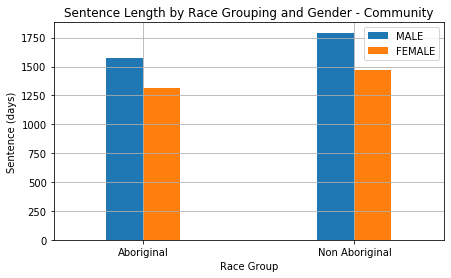

In [296]:
ax_reli_cm = ave_sen_cm.plot.bar(rot=0, 
                         figsize=((7,4)), 
                         width=0.35, 
                         grid=True,
                         title='Sentence Length by Race Grouping and Gender - Community')
ax_reli_cm.legend(['MALE','FEMALE'])
ax_reli_cm.set_xlabel('Race Group')
ax_reli_cm.set_ylabel('Sentence (days)')

Text(0, 0.5, 'Sentence (days)')

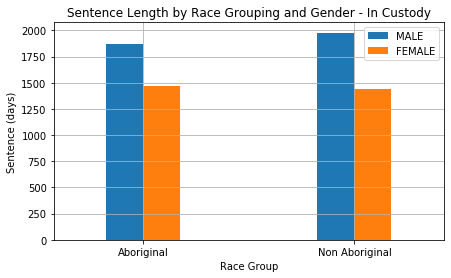

In [298]:
ax_reli_ct = ave_sen_ct.plot.bar(rot=0, 
                         figsize=((7,4)), 
                         width=0.35, 
                         grid=True,
                         title='Sentence Length by Race Grouping and Gender - In Custody')
ax_reli_ct.legend(['MALE','FEMALE'])
ax_reli_ct.set_xlabel('Race Group')
ax_reli_ct.set_ylabel('Sentence (days)')